In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

In [2]:
url = 'https://raw.githubusercontent.com/PittariJonatan/Data-Sets/main/Airline%20Dataset%20Updated.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [4]:
# Creamos una copia de nuestro data set para conservar original y manipular copia.

df_copy = df.copy()

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Comprobamos que no haya valores nulos en el data set. 

df_copy.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

# Acá comenta acerca del inicio de la reestructuración del df_copy del cual vas a alimentar tu algoritmo final.

In [7]:
# Mejoramos la legibilidad de ['Passanger ID'] para su posterior manipulación.

df_copy['Passenger ID'] = range(1,len(df_copy) + 1)

In [8]:
# Consideramos que para este Target en específico, las columnas ['First Name', 'Last Name'] no son de relevancia para nuestro modelo a futuro.

df_copy = df_copy.drop(['First Name', 'Last Name'], axis=1)

In [9]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


In [10]:
# Inspeccionamos los valores alojados en ['Flight Status'].

df_copy['Flight Status'].value_counts()

Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64

# Acá acordate que empezas dandole forma al target y seteando el punto de anclaje para todas las demás variables.

In [11]:
# Declaramos Flight Status como nuestra variable target ['Status Target'], en donde trataremos todos los vuelos completados como 0 y 1 para todos aquellos que tuvieron cancelación confirmada. Posteriormente procederemos a eliminar la columna ['Flight Status'] ya que la codificamos de una manera mas acorde para el modelo a futuro.

df_copy['Status Target'] = (df_copy['Flight Status']=='Cancelled').astype(int)
df_copy = df_copy.drop(['Flight Status'], axis = 1)

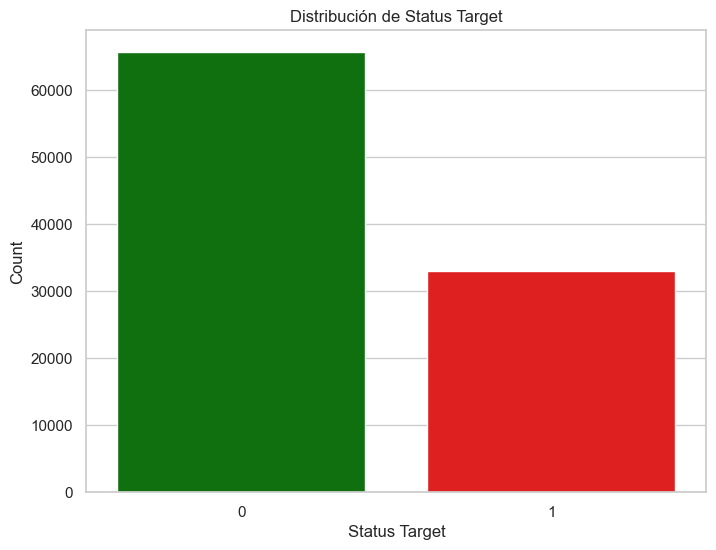

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Status Target', data=df_copy, palette={0: 'green', 1: 'red'})

plt.xlabel('Status Target')
plt.ylabel('Count')
plt.title('Distribución de Status Target')

plt.show()

# Acá comenta acerca de que buscas al tratar la columna ['Arrival Airport']

In [13]:
# Importamos datos de una Api, para corroborar ciertas incertidrumbres con ['Arrival Airport'].

url2 = 'https://raw.githubusercontent.com/lxndrblz/Airports/main/airports.csv'
api_1 = pd.read_csv(url2, sep=',')  

In [14]:
df['Arrival Airport'].nunique()


9024

In [15]:
api_1['city_code'].nunique()

9193

In [16]:
api_1.head()

,code,time_zone_id,name,city_code,country_id,location,elevation,url,icao,city,county,state
0,UGL,Antarctica/South_Pole,Union Glacier Blue-Ice Runway,UGL,AQ,POINT (-83.320833 -79.777778),2461,NaN,SCGC,NaN,NaN,NaN
1,SXW,Pacific/Port_Moresby,Sauren,SXW,PG,POINT (148.95305 -5.971389),177,NaN,AYSV,NaN,NaN,NaN
2,NDV,America/New_York,USN Heliport,NDV,US,POINT (-77 38.86667),19,NaN,NaN,NaN,NaN,NaN
3,EAP,Europe/Zurich,EuroAirport Basel-Mulhouse-Freiburg Airport,EAP,CH,POINT (7.529167 47.59),846,NaN,NaN,Basel,NaN,NaN
4,NET,America/Nassau,New Bight,NET,BS,POINT (-75.45763803663925 24.314824100000003),36,NaN,NaN,NaN,NaN,NaN


In [17]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Status Target
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,0
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,0
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,0
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,0
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,1
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,1
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,0
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,1


In [18]:
# Joineamos la columna ['name'] de api_1 con nuestro df_copy a través de la columna ['Arrival Airport'] en donde se encuentra el aeropuerto de llegada.

df_copy = pd.merge(df_copy, api_1[['code', 'name']], 
                   how='left', left_on='Arrival Airport', right_on='code')


df_copy = df_copy.drop(columns=['code'])
df_copy = df_copy.drop(columns=['Arrival Airport'])

df_copy = df_copy.rename(columns={'name': 'Arrival Airport'})
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Pilot Name,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,Edithe Leggis,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,Elwood Catt,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,Darby Felgate,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,Dominica Pyle,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,Bay Pencost,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,Gareth Mugford,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,Kasey Benedict,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,Darrin Lucken,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,Gayle Lievesley,1,Gagnoa


- Bien, para terminar con las dudas acerca de las columnas ['Airport Name'] y ['Arrival Airport'], joineamos de una Api publica el IATA Code Intenational y notamos que en ambos casos coinciden con ['code'] y ['name'] del registro invocado. Damos por acentado que la columna ['Airport Name'] hace referencia no al punto de partida de la persona, si no más bien con el de llegada. Podemos confirmar que ['Arrival Airport'] == ['Airport Name'], así que pocedimos a la eliminacion de ['Arrival Airport'] dado que cataloga como información redundante para nuestro modelo predictivo.

# Pilotos, escribi todo sobre eso

In [19]:
# Observamos el contenido de ['Pilot Name'].

df_copy['Pilot Name']

0            Edithe Leggis
1              Elwood Catt
2            Darby Felgate
3            Dominica Pyle
4              Bay Pencost
               ...        
98614       Gareth Mugford
98615       Kasey Benedict
98616        Darrin Lucken
98617      Gayle Lievesley
98618    Wilhelmine Touret
Name: Pilot Name, Length: 98619, dtype: object

In [20]:
# Controlamos la cantidad máxima de vuelos que posee registrado cada piloto en este data set.

max_flights_per_pilot = df_copy.groupby('Pilot Name')['Passenger ID'].count().max()

max_flights_per_pilot


2

In [21]:
# Eliminamos la columna ['Pilot Name'] ya que como máximo un piloto llego a tener dos vuelos, no es una variable significativa para nuestro modelo a futuro.

df_copy = df_copy.drop(['Pilot Name'], axis=1)

In [22]:
# Renombramos la columna ['Country Name'] por ['Country'] para mayor entendimiento y practicidad.

df_copy.rename(columns = {'Country Name':'Country'}, inplace = True)

In [23]:
# Eliminamos la columna ['Airport Country Code'], dado que tomaremos esta misma como información redundante.

df_copy = df_copy.drop(['Airport Country Code'], axis = 1)

In [24]:
# Eliminamos la columna ['Airport Continent'], dado que tomaremos esta misma como información redundante.

df_copy = df_copy.drop(['Airport Continent'], axis = 1)

In [25]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa


# Acá pone un título para explicar como vas a adentrarte en la variable continentes y ver como la podes desglozar con otras variables para darle un poco mas de forma

In [26]:
# Obersevamos los valores de ['Continents'].

df_copy['Continents'].value_counts()

Continents
North America    32033
Asia             18637
Oceania          13866
Europe           12335
Africa           11030
South America    10718
Name: count, dtype: int64

In [27]:
# Creamos la variable ['cancelled_continents_counts'] para comprobar si aproximadamente la relación 1/3 que se presenta en líneas generales en los valores totales de cancelled con respecto a filled. Confirmamos que es correcto.

cancelled_continents_counts = df_copy[df_copy['Status Target'] == 1]['Continents'].value_counts()
cancelled_continents_counts

Continents
North America    10693
Asia              6235
Oceania           4619
Europe            4095
Africa            3657
South America     3643
Name: count, dtype: int64

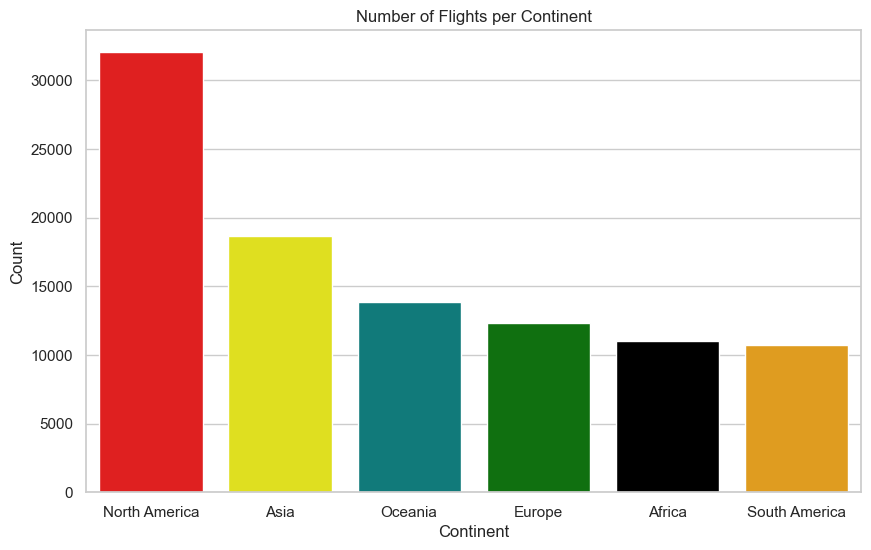

In [28]:
# Visualizamos la cantidad de vuelos por continente para empezar a entender el comportamiento de esta variable.

colors = {'North America': 'red', 'Asia': 'yellow', 'Oceania': 'darkcyan', 'Europe': 'green', 'Africa': 'black', 'South America': 'orange'}

continents_counts = df_copy['Continents'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=continents_counts.index, y=continents_counts, palette=colors)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Number of Flights per Continent')
plt.show()

In [53]:
# Creamos variable ['airports_per_continent'] para confirmar que efectivamente existe una relación directa en la cantidad de vuelos que realiza un continente, con respecto a la cantidad de aeropuertos que contiene cada uno.

airports_per_continent = df_copy.groupby('Continents')['Arrival Airport'].nunique().sort_values(ascending=False)
airports_per_continent

Continents
North America    2717
Asia             1699
Oceania          1288
Europe           1072
Africa           1010
South America     856
Name: Arrival Airport, dtype: int64

- Bien hasta aca lo que hice fue, primero ver la cantidad de vuelos totales por continente. Acto seguido me fije si efectivamente a mayor cantidad de aeropuertos, mayor cantidad de vuelos. Y por último comprobe que la relación aproximadamente de 1/3 que se presenta entre los cancelados con respecto a los completados se sigue sosteniendo de igual manera o presenta algún tipo de anomalía. Todo sigue correcto.

In [54]:
# Creamos variable ['cancelled_airports_counts'] para determinar si existe una correlación fuerte entre la cantidad de cancelacionces con respecto al aeropuerto.

cancelled_airports_counts = df_copy[df_copy['Status Target'] == 1]['Airport Name'].value_counts()


correlation = df_copy.groupby('Airport Name')['Status Target'].mean().corr(cancelled_airports_counts)
correlation


0.721752040699472

# ACÁ TENES UNA POSIBLE FEATURE

- Acá pone observación acerca del 0,72 obtenido como resultado.

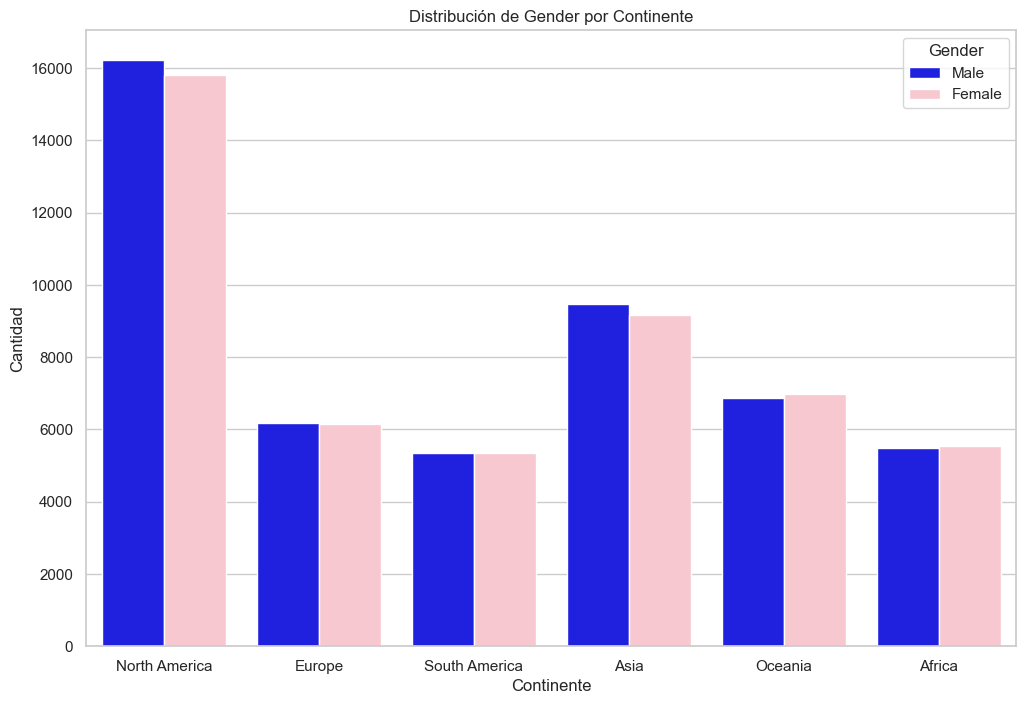

In [31]:
# Grafiquemos ahora la relación ['Gender'] y ['Continents'], en buscas de anomalías.


plt.figure(figsize=(12, 8))
sns.countplot(x='Continents', hue='Gender', data=df_copy, hue_order=['Male', 'Female'], palette={'Male': 'blue', 'Female': 'pink'}, dodge=True)
plt.xlabel('Continente')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Continente')
plt.legend(title='Gender')
plt.show()

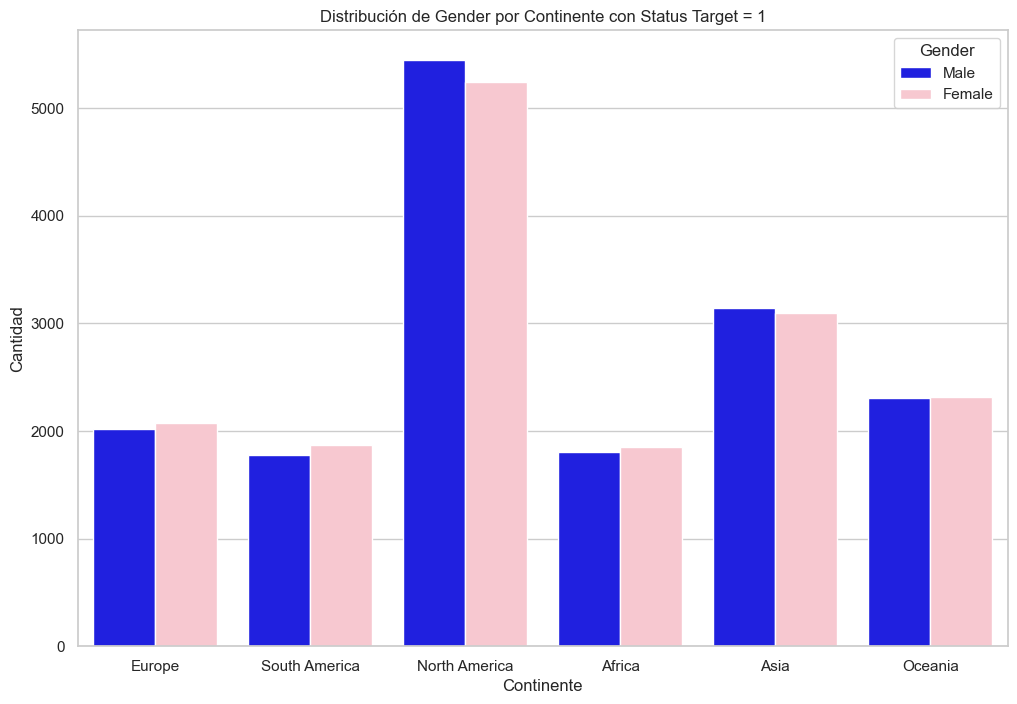

In [32]:
# Ahora observemos si sigue manteniendo la misma relación en los casos donde ['Status Flight'] es 1.


df_status_1 = df_copy[df_copy['Status Target'] == 1]

plt.figure(figsize=(12, 8))
sns.countplot(x='Continents', hue='Gender', data=df_status_1, hue_order=['Male', 'Female'], palette={'Male': 'blue', 'Female': 'pink'}, dodge=True)
plt.xlabel('Continente')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Continente con Status Target = 1')
plt.legend(title='Gender')
plt.show()

- No observamos algún tipo de comportamiento significativo para el modelo predictivo entre dichas variables. Si bien North America presenta una diferencia, no considero que sea una tendencia óptima para considerar.

In [33]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa


# Empezamos con Gender ahora, análisis univariado y bivariado vs Target acordate

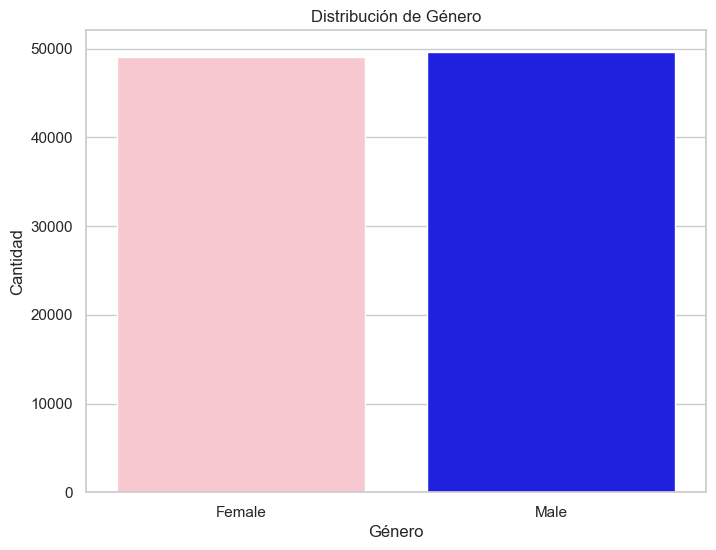

In [34]:
# Visualizamos el patrón que presenta la distribución de los casos presentes en df_copy. 

colores_genero = {'Female': 'pink', 'Male': 'blue'}

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_copy, palette=colores_genero)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género')
plt.show()

- Observamos una dristribución bastante simétrica entre una y otra, no vemos patrones significativos.

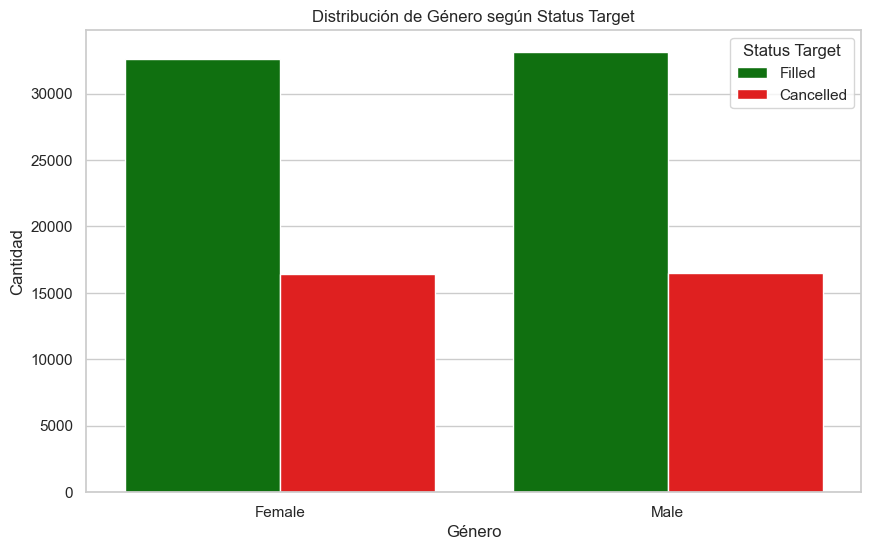

In [35]:
# Buscamos realizar un análisis bivariado entre ['Gender'] y nuestro Target. 

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Status Target', data=df_copy, palette={0: 'green', 1: 'red'})

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género según Status Target')
plt.legend(title='Status Target', loc='upper right', labels=['Filled', 'Cancelled'])
plt.show()


- Podemos establecer que de manera directa la variable ['Gender'] por si sola, no presenta patrones significativos para nuestro algoritmo. Quizás desglozada con otras variables adquiera mas sentido.

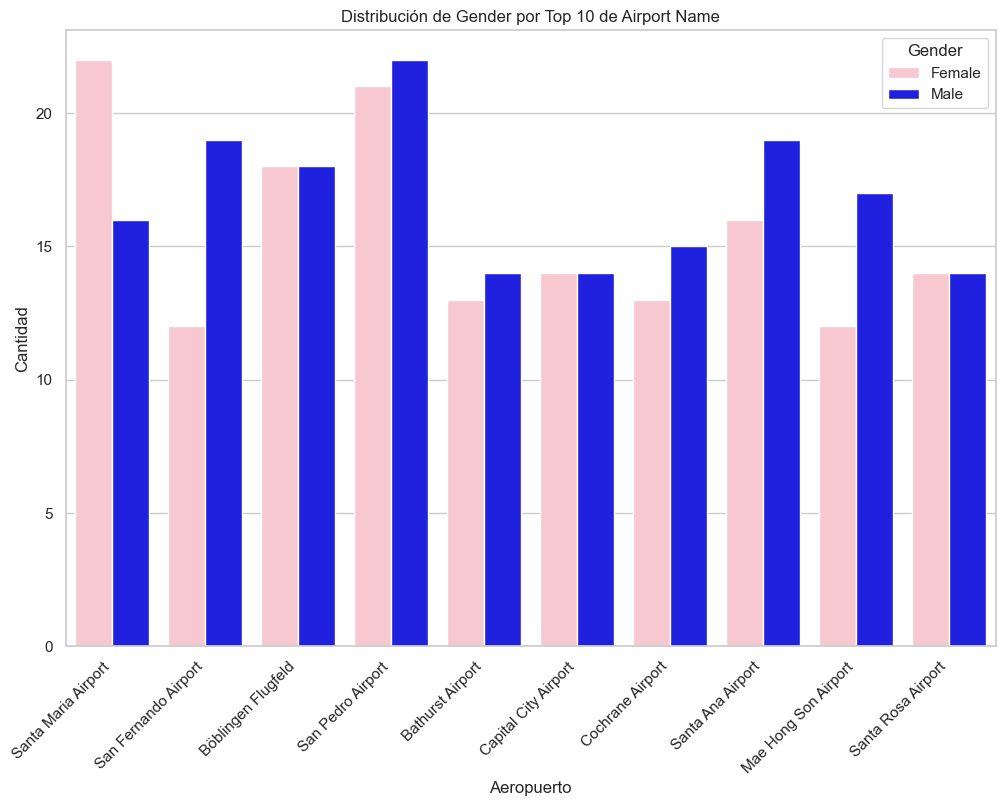

In [55]:
# Graficamos el comportamiento de ['Gender'] con respecto a ['Airport Name'] para entender el comportamiento de estas varibables entre sí.

top_airports = df_copy['Airport Name'].value_counts().head(10).index

df_top_airports = df_copy[df_copy['Airport Name'].isin(top_airports)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Airport Name', hue='Gender', data=df_top_airports, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Aeropuerto')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Top 10 de Airport Name')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

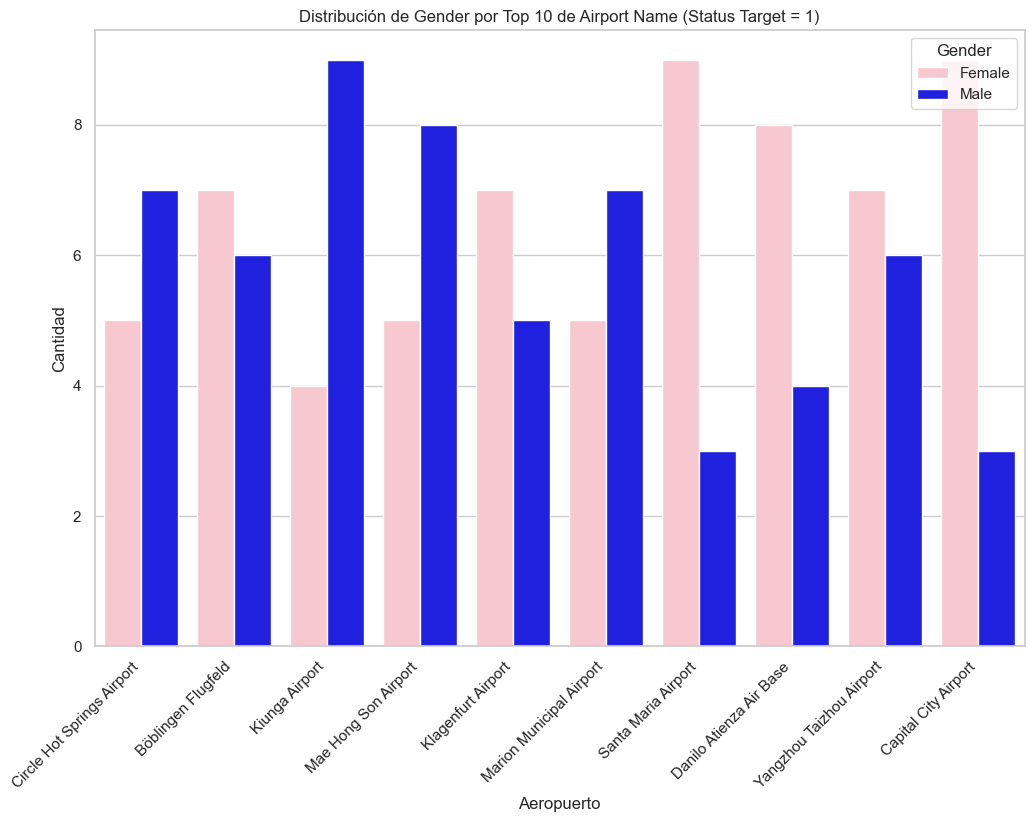

In [56]:
# Ahora procedemos a obervar si existe patrón entre ambas cuando ['Status Target'] es 1.


df_status_1 = df_copy[df_copy['Status Target'] == 1]

top_airports_status_1 = df_status_1['Airport Name'].value_counts().head(10).index

df_top_airports_status_1 = df_copy[(df_copy['Airport Name'].isin(top_airports_status_1)) & (df_copy['Status Target'] == 1)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Airport Name', hue='Gender', data=df_top_airports_status_1, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Aeropuerto')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Top 10 de Airport Name (Status Target = 1)')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

- Observamos que existe mayor variación que en otros casos cuando ['Status Traget'] es 1. Podría ser un factor a incluir en el modelo predictivo ya que, hay Airports en donde el mayor número de cancelaciones es female, y otros donde es male, por ende se puede decir que dependiendo el ['Arrival Airport'] existe un % de probabilidad de cancelled dependiendo el género.

# Acá vamos con Age univariado y bivariado vs Target, redacta sobre eso.

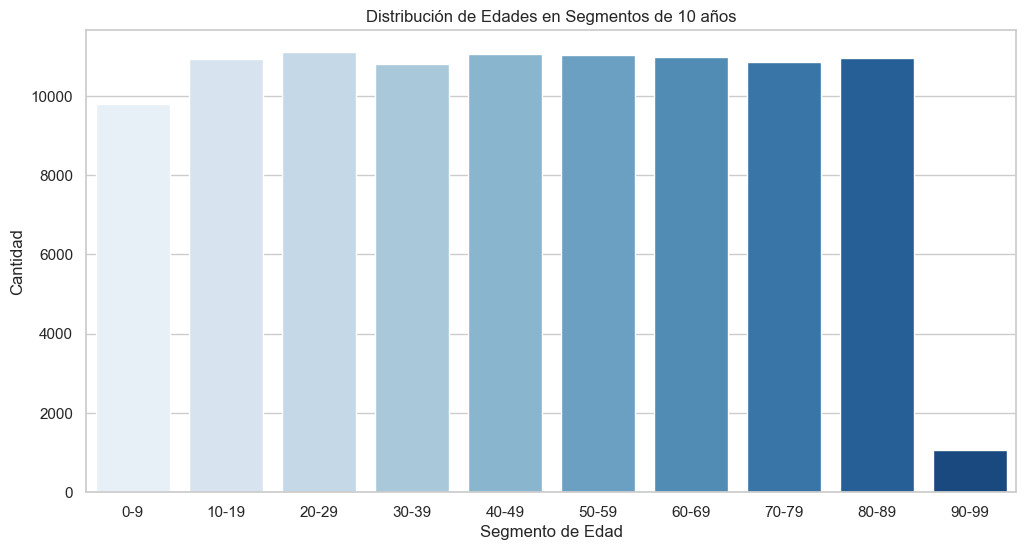

In [38]:
# Procedemos a graficar ['Age'] de manera univariada, para empezar a tener una idea sobre como se comporta dicha variable.

df_copy['Age Segment'] = pd.cut(df_copy['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

plt.figure(figsize=(12, 6))
sns.countplot(x='Age Segment', data=df_copy, palette='Blues')
plt.xlabel('Segmento de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades en Segmentos de 10 años')
plt.show()


df_copy.drop('Age Segment', axis=1, inplace=True)

- Observamos que ['Age'] por si sola, solo presenta una variación en el segmento entre 90 y 100 pero solo por la escasez de casos que existen en ese rango, no por otras cuestiones. 

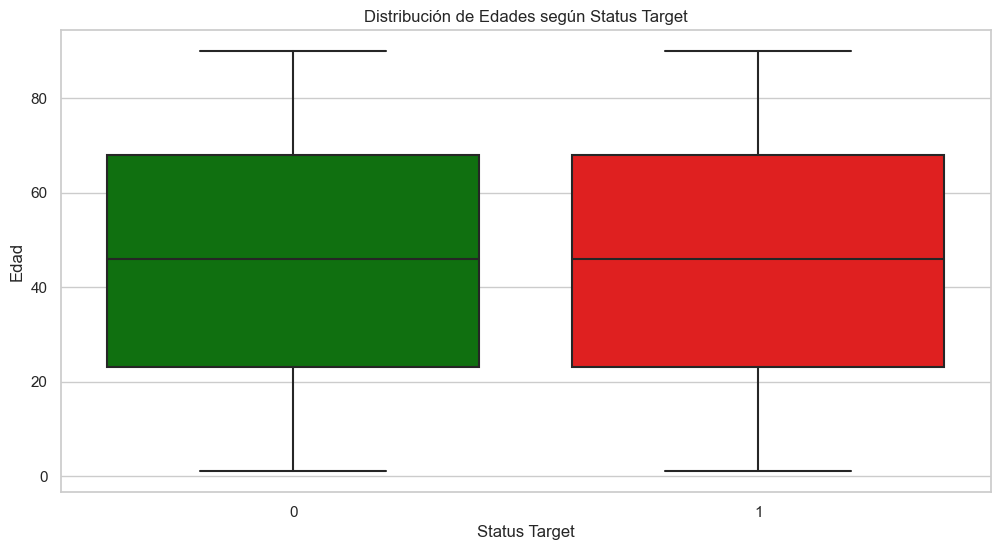

In [39]:
# Análisis bivariado de ['Age'] vs ['Status Target'], para corroborar si existen anomalías.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Status Target', y='Age', data=df_copy, palette={0: 'green', 1: 'red'})
plt.xlabel('Status Target')
plt.ylabel('Edad')
plt.title('Distribución de Edades según Status Target')
plt.show()

- En el caso del análisis bivariado de ['Age'] vs ['Status Target'], vemos que no presenta anomalías de ningún tipo tampoco. Por ende la variable por si sola carece de impacto en el modelo predictivo. Deberíamos tratar de mezclarlas con otras para ver si le agregamos valor.

# Acá vamos con Nationality , redacta sobre eso.

In [40]:
# Observamos un total de 240 Nacionalidades alojadas en el data set.

df_copy['Nationality'].nunique()

240

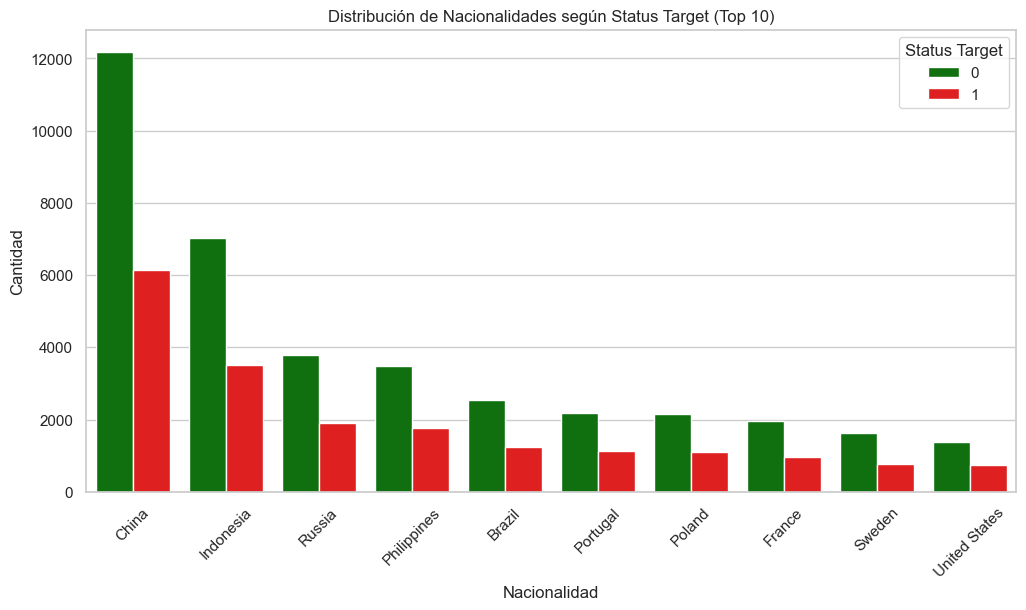

In [41]:
# Creamos un Top 10 de ['Nationality'] y lo trasladamos a un gráfico de barras, para empezar a entender sobre el comportamiento de dicha variable.

top_nationalities = df_copy['Nationality'].value_counts().nlargest(10).index

df_top_nationalities = df_copy[df_copy['Nationality'].isin(top_nationalities)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', hue='Status Target', data=df_top_nationalities, palette={0: 'green', 1: 'red'}, order=top_nationalities)
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad')
plt.title('Distribución de Nacionalidades según Status Target (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='Status Target', loc='upper right')
plt.show()


- A grandes rasgos se puede observar como una tendencia 1/2 de Filled con respecto de Cancelled. Parece a modo de vista general que los casos cancelled son tendencialmente a ser aproximadamente 1/2 de los filled.

In [42]:
# Realizamos un sondeo para encontrar anomalías con respecto al comportamiento que describimos 1/2 de filled vs cancelled. 

half_filled_count = df_copy[df_copy['Status Target'] == 0].shape[0] / 2

error_margin_percentage = 7  # Pusimos un 7% de margen de error, para intentar contemplar lo más mínimo.

lower_bound = half_filled_count - (half_filled_count * error_margin_percentage / 100)
upper_bound = half_filled_count + (half_filled_count * error_margin_percentage / 100)

df_filtered = df_copy.groupby('Nationality')['Status Target'].apply(lambda x: np.logical_or(x.sum() < lower_bound, x.sum() > upper_bound)).reset_index()

nationalities_out_of_range = df_filtered[df_filtered['Status Target']]

nationalities_out_of_range

,Nationality,Status Target
0,Afghanistan,True
1,Aland Islands,True
2,Albania,True
3,Algeria,True
4,American Samoa,True
...,...,...
235,Wallis and Futuna,True
236,Western Sahara,True
237,Yemen,True
238,Zambia,True


- Encontramos que en 240 filas el patrón 1/2 aprox entre filled vs cancelled parece no presentarse.

In [43]:
# Creamos una división de la variable ['nationalities_out_of_range'] en donde por un lado buscaremos los valores donde los cancellados superan la relación 1/2 y los que no, en ambos casos contemplando un margen de error del 8%.

df_ratios = df_copy.groupby('Nationality')['Status Target'].mean().reset_index()


error_margin_percentage = 7  

lower_bound = 0.5 - (0.5 * error_margin_percentage / 100)
upper_bound = 0.5 + (0.5 * error_margin_percentage / 100)

nationalities_greater_than_50  = df_ratios[df_ratios['Status Target'] > upper_bound]

nationalities_less_than_50  = df_ratios[df_ratios['Status Target'] < lower_bound]

print("Nacionalidades donde la relación es mayor al 50% con margen de error:")
print(nationalities_greater_than_50 )

print("\nNacionalidades donde la relación es menor al 50% con margen de error:")
print(nationalities_less_than_50 )


Nacionalidades donde la relación es mayor al 50% con margen de error:
                   Nationality  Status Target
3                      Algeria       0.666667
23                     Bermuda       0.714286
30      British Virgin Islands       1.000000
48                Cook Islands       1.000000
123                      Macao       1.000000
132                 Martinique       0.571429
147                      Nauru       0.571429
155                       Niue       0.666667
183  Saint Pierre and Miquelon       0.750000
193                  Singapore       0.666667

Nacionalidades donde la relación es menor al 50% con margen de error:
           Nationality  Status Target
0          Afghanistan       0.352792
1        Aland Islands       0.250000
2              Albania       0.337079
4       American Samoa       0.230769
5              Andorra       0.444444
..                 ...            ...
235  Wallis and Futuna       0.125000
236     Western Sahara       0.200000
237        

In [44]:
nationalities_greater_than_50 .value_counts().sum()

10

In [45]:
nationalities_less_than_50 .value_counts().sum()

216

- Con esto notamos que hay 10 Nacionalidades con una tendencia a tener mayor % de cancelaciones por sobre el resto. En contra parte vemos como también existen 216 que se comportan de manera contraria, con una tendencia bajista en este área. Es un patrón considerable a la hora de construir nuestro modelo predictivo.

In [46]:
# Filtramos las Nacionalidades que estén por debajo de un 0.6 % en Status Target.

nationalities_greater_than_60 = nationalities_greater_than_50[nationalities_greater_than_50['Status Target'] > 0.6].copy()

nationalities_greater_than_60

,Nationality,Status Target
3,Algeria,0.666667
23,Bermuda,0.714286
30,British Virgin Islands,1.000000
48,Cook Islands,1.000000
123,Macao,1.000000
155,Niue,0.666667
183,Saint Pierre and Miquelon,0.750000
193,Singapore,0.666667


# ACÁ TENES UNA POSIBLE FEATURE

- Posiblemente esta sea una variable a insertar en nuestro algoritmo predictivo.

# COUNTRY empezamos a conocer la variable, redacta sobre eso.

In [47]:
# Controlamos la cantidad de Paises contemplados en nuestro data set.

df_copy['Country'].nunique()

235

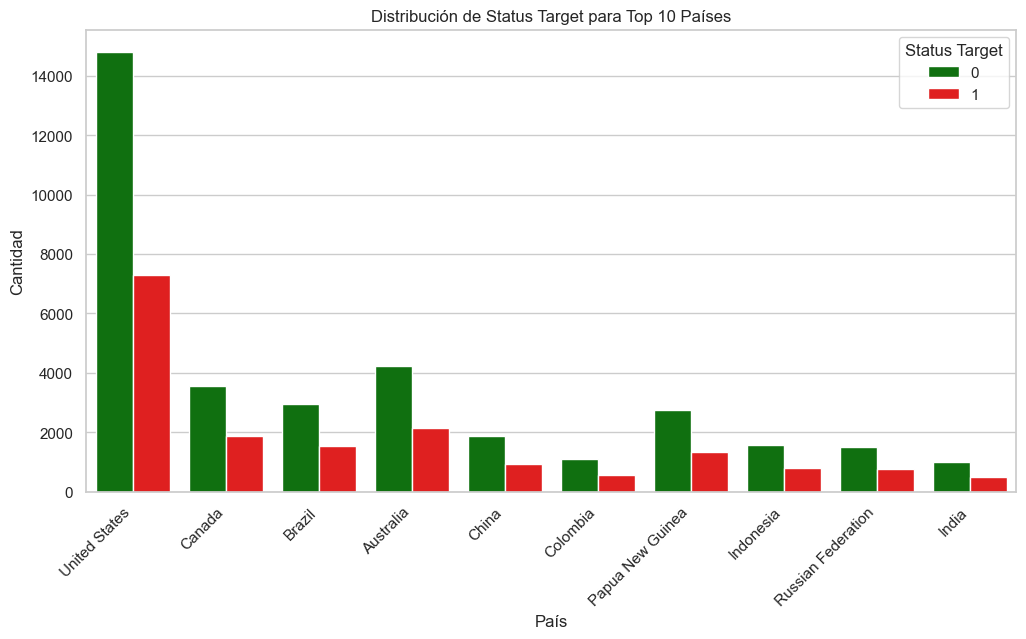

In [48]:
# Crearemos un top 10 de ['Country'] para posteriormente graficarlo y empezar a tener una comprensión del comportamiento de dicha variable con respecto al Target.

top_countries = df_copy['Country'].value_counts().head(10).index

df_top_countries = df_copy[df_copy['Country'].isin(top_countries)]

custom_palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Status Target', data=df_top_countries, palette=custom_palette)
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Status Target para Top 10 Países')
plt.legend(title='Status Target')
plt.xticks(rotation=45, ha='right')
plt.show()


In [49]:
# Veamos ahora la lista de países en donde la cantidad de cancelled supera la cantidad de filled.

df_cancelled_vs_filled = df_copy.groupby('Country')['Status Target'].value_counts().unstack().fillna(0)

countries_more_cancelled_than_filled = df_cancelled_vs_filled[df_cancelled_vs_filled[1] > df_cancelled_vs_filled[0]]

num_countries_more_cancelled_than_filled = len(countries_more_cancelled_than_filled)

num_countries_more_cancelled_than_filled

3

- Considerando que el df aloja la información acerca de 235 países, no es necesario profundizar en aquellos casos en donde la cantidad de cancelled es mayor a los filled, dado que solo representa un 1,27 % del total. No es una variable muy óptima para incluir en el modelo. Buscaremos desglozar ['Country'] con otro tipo de variables.

In [50]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa


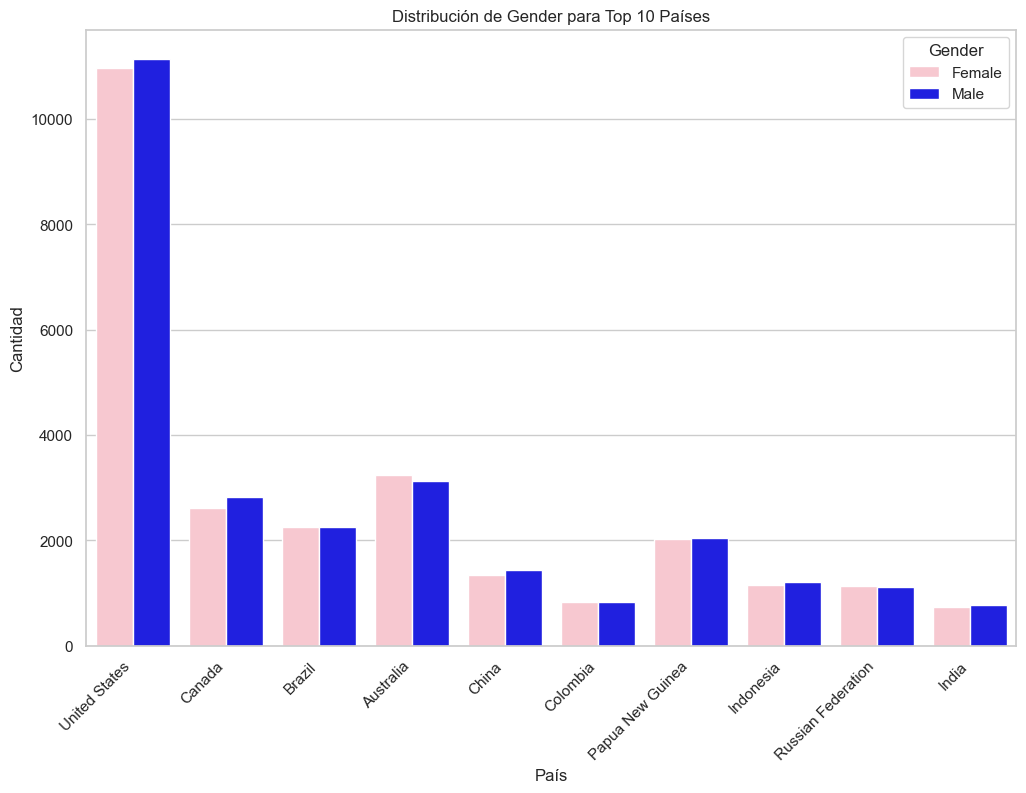

In [51]:
# Obervemos el patrón que puede presentar la variable ['Country'] con respecto a ['Gender'] en busca de anomalías.

colors = {'Male': 'blue', 'Female': 'pink'}


plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Gender', data=df_top_countries, palette=colors, dodge=True)
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender para Top 10 Países')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

- No observamos anomalías significativas para incluir en el modelo predictivo.

In [52]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa
